Challenge is to predict which African startups will make it to a Series A round.
Have over 4,000+ African companies that have raised funding and other data points about them.
Given a startup/company, can one predict probability of success. Informs sourcing and investment screening.
Leads to an investability score.
However, the recall metric for all three classifiers was very low. This means that models misclassified 70% of successful startups as unsuccessful. 
We would like the algorithm to discover more successful startups and not only those which follow the most popular patterns.

Series A financing refers to an investment in a privately-held, 
start-up company after it has shown progress in building its business model and demonstrates the potential to grow and generate revenue.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
%matplotlib inline


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
#df = pd.read_csv('MOCK_DATA (2).csv')
df = pd.read_excel ('Companies.xlsx')
df.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Duplication.1,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(3084, 118)

In [5]:
df_deals = pd.read_excel ('Deals (investment).xlsx')
#df_deals.head()

In [6]:
df_deals.loc[df_deals['2_post_title'] == 'Andela']

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Duplication,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Investor 15,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,Investor 13.1,Investor 14.1,Investor 15.1,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
72,2014-09-23,Andela,3000000,NaN,Seed,"Susa Ventures, Steve Case, SparkLabs Global Ve...",https://www.crunchbase.com/funding_round/andel...,United States,United States,"Edtech, BPO, Recruitment, Software, Training",Commercial & Professional Services,Andela,0.9,41905Andela3000000,NaN,1.0,2014.0,181000000.0,NaN,2. Seed,Other Technologies & Information Technology,2014.0,9.0,3.0,2.0,14.0,Velocity Capital Private Equity,Steve Case,SparkLabs Global Ventures,Rothenberg Ventures,Peak Ventures,Omidyar Network,Melo7 Tech Partners,Learn Capital,HIGHLINEvc,GSV AcceleraTE,Founder Collective,Chris Hughes,CRE Venture Capital,Arena Ventures,0.0,NaN,NaN,NaN,Velocity Capital Private Equity,Steve Case,SparkLabs Global Ventures,Rothenberg Ventures,Peak Ventures,Omidyar Network,Melo7 Tech Partners,Learn Capital,HIGHLINEvc,GSV AcceleraTE,Founder Collective,Chris Hughes,CRE Venture Capital,Arena Ventures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2015-06-25,Andela,14000000,NaN,Series A,"Spark Capital, GV, International Finance Corpo...",https://techcrunch.com/2015/06/25/backed-by-sp...,United States,United States,"Edtech, BPO, Recruitment, Software, Training",Commercial & Professional Services,Andela,0.9,42180Andela14000000,NaN,1.0,2014.0,181000000.0,NaN,3. Early Venture,Other Technologies & Information Technology,2015.0,6.0,2.0,1.0,10.0,Spark Capital,GV,International Finance Corporation,Susa Ventures,PlayFair Capital,GSV Acceleration,Arena Ventures,CRE Venture Capital,Golden Palm Investments,Future Perfect Ventures,0,0,0,0,0.0,NaN,NaN,NaN,Spark Capital,GV,International Finance Corporation,Susa Ventures,PlayFair Capital,GSV Acceleration,Arena Ventures,CRE Venture Capital,Golden Palm Investments,Future Perfect Ventures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,2016-06-20,Andela,24000000,NaN,Series B,"Chan Zuckerberg Initiative, Spark Capital, Soc...",http://disrupt-africa.com/2016/06/andela-raise...,United States,United States,"Edtech, BPO, Recruitment, Software, Training",Commercial & Professional Services,Andela,0.9,42541Andela24000000,NaN,1.0,2014.0,181000000.0,NaN,3. Early Venture,Other Technologies & Information Technology,2016.0,6.0,2.0,1.0,9.0,Spark Capital,Spark Capital,Social Impact Capital,Omidyar Network,Learn Capital,GV,GSV Acceleration,Flat World Partners,Battery Road Digital Holdings,0,0,0,0,0,0.0,NaN,NaN,NaN,Spark Capital,Spark Capital,Social Impact Capital,Omidyar Network,Learn Capital,GV,GSV Acceleration,Flat World Partners,Battery Road Digital Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,2017-11-10,Andela,40000000,NaN,Series C,"CRE Venture Capital, TLcom Capital Partners, S...",http://disrupt-africa.com/2017/10/andela-raise...,United States,United States,"Edtech, BPO, Recruitment, Software, Training",Commercial & Professional Services,Andela,0.9,43049Andela40000000,NaN,1.0,2014.0,181000000.0,NaN,4. Late Venture,Other Technologies & Information Technology,2017.0,11.0,4.0,2.0,9.0,Finnfund (Finnish Fund for Industrial Cooperat...,TLcom Capital Partners,Salesforce Ventures,Golden Palm Investments,GV,DBL Partners,Chan Zuckerberg I

In [7]:
a=df_deals['2_post_title'].unique().tolist()
#a

In [8]:
len(a)


801

In [9]:
df_new = df_deals[['2_post_title','1_post_date','3_amount','5_funding_round']]
#brics[["country", "capital"]]
df_new.head()
df_andela = df_new.loc[df_new['2_post_title'] == "Kopo Kopo"]
df_andela

,2_post_title,1_post_date,3_amount,5_funding_round
5,Kopo Kopo,2010-08-20,75000,Seed
11,Kopo Kopo,2011-11-17,865000,Seed
12,Kopo Kopo,2011-11-17,864900,Seed
42,Kopo Kopo,2013-11-12,2600000,Series A
122,Kopo Kopo,2015-10-14,2100000,Series B


In [10]:
#df_andela.set_index('Year').diff()
df_andela['A_dif'] = df_andela['1_post_date'].diff()
df_andela['A_dif']

<ipython-input-10-0882acad289e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andela['A_dif'] = df_andela['1_post_date'].diff()


5          NaT
11    454 days
12      0 days
42    726 days
122   701 days
Name: A_dif, dtype: timedelta64[ns]

In [11]:
#df_andela['A_dif'].fillnat(0)

#df["weight"].mean()

In [12]:
df_andela['A_dif'].mean()

Timedelta('470 days 06:00:00')

In [13]:
#df.drop["Unnamed:66","Unnamed:67","Unnamed:68","Unnamed:69","Unnamed:70"]
df_needed=df.drop(['Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69','Unnamed: 70','Unnamed: 71','Unnamed: 72',
         'Unnamed: 73','Unnamed: 74','Unnamed: 75','Unnamed: 76','Unnamed: 77','Unnamed: 78','Unnamed: 79','Unnamed: 80',
         'Unnamed: 82','Unnamed: 83','Unnamed: 84','Unnamed: 85','Unnamed: 86','Unnamed: 87','Unnamed: 88','Unnamed: 89',
         'Unnamed: 90','Unnamed: 91',
         'Unnamed: 92','Unnamed: 93','Unnamed: 94','Unnamed: 95','Unnamed: 96','Unnamed: 97','Unnamed: 98','Unnamed: 100',
         'Unnamed: 101','Unnamed: 102','Unnamed: 103','Unnamed: 104','Unnamed: 105','Unnamed: 106','Unnamed: 107','Unnamed: 108',
         'Unnamed: 109','Unnamed: 110','Unnamed: 111','Unnamed: 112','Unnamed: 113','Unnamed: 114','Unnamed: 115','Unnamed: 99'], axis = 1)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",NaN,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN
3,Zola Electric,ZOLA Electric (formerly Off Grid Electric) is ...,Active,2011.0,"Arusha, Tanzania",NaN,Tanzania,Tanzania,Tanzania,NaN,NaN,NaN,NaN,"GE Ventures, Helios Investment Partne

In [14]:
#df_needed['Average time of rounds(days)'].isnull().sum()
df_needed.shape

(3084, 69)

In [15]:
#df_needed['20_Female_Co-Founder (Yes = 1; No = 0)'].values 

In [16]:
df_needed["7.2_Assigned_Country (Africa)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['7.2_Assigned_Country (Africa)'].isnull().sum()

0

In [17]:
df_needed["2_Company_description"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['2_Company_description'].isnull().sum()

0

In [18]:
df_needed["8_Countries_of_operation_(Business Model/Market)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['8_Countries_of_operation_(Business Model/Market)'].isnull().sum()

0

In [19]:
df_needed["21_Main_sector"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['21_Main_sector'].isnull().sum()

0

In [20]:
df_needed["11_Investors"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['11_Investors'].isnull().sum()

0

In [21]:
df_needed["19_Founders"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['19_Founders'].isnull().sum()

0

In [22]:
df_needed["22_Categories"].fillna("Not known", inplace = True)
df_needed['22_Categories'].isnull().sum()

0

In [23]:
#6_Other_offices
df_needed["6_Other_offices"].fillna("Not known", inplace = True)
df_needed['6_Other_offices'].isnull().sum()

0

In [24]:
#Counting the numbers of countires where there are business market.
df_needed['number of market countires'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [25]:
#Counting the numbers of investors a company has.
df_needed['number of investors'] = df_needed['11_Investors'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [26]:
#19_Founders
#Counting the numbers of founders a company has.
df_needed['number of founders'] = df_needed['19_Founders'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [27]:
#Counting the numbers of bussiness categories a company has.
df_needed['number of bussiness categories'] = df_needed['22_Categories'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [28]:
#Counting the numbers of Other offices a company has.
df_needed['number of other offices'] = df_needed['6_Other_offices'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",Not known,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN,1,0,1,3,0
3,Zola Electr

In [29]:
#Using lambda functions in sorting and filtering data

In [30]:

#creating new columns with binary values
df_needed['Assigned_Country_Nigeria'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Nigeria' else 0)
df_needed['Assigned_Country_South Africa'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='South Africa' else 0)
df_needed['Assigned_Country_Kenya'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Kenya' else 0)
df_needed['Assigned_Country_Egypt'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Egypt' else 0)
#df_needed.head()
#df_needed['7.2_Assigned_Country (Africa)'].value_counts() 

In [31]:
df_needed['Business_operated in South Africa'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'South Africa' in x.split(',') else 0) #those with python give 1 or else 0
df_needed['Business_operated in Nigeria'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Nigeria' in x.split(',') else 0)
df_needed['Business_operated in Kenya'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Kenya' in x.split(',') else 0)
df_needed['Business_operated in Egypt'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Egypt' in x.split(',') else 0)
#df_needed['Business_operated in Egypt'].value_counts() 
#df_needed.head()
#df_needed['8_Countries_of_operation_(Business Model/Market)'].value_counts() 

In [32]:
#df_needed['21_Main_sector'].value_counts() 

In [33]:
df_needed['Sector_Financial Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Financial Services' in x.split('&') else 0)
df_needed['Sector_Information Technology'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Information Technology' in x.split('&') else 0)
df_needed['Sector_E-Commerce & Retail'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'E-Commerce & Retail' in x.split('&') else 0)
df_needed['Sector_Commercial & Professional Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Commercial & Professional Services' in x.split('&') else 0)
#df_needed['Sector_Commercial & Professional Services'].value_counts() 
#df_needed.head()

In [34]:
#global   checking out company descriptions with global
df_needed['global_Company'] = df_needed['2_Company_description'].apply(lambda x: 1 if '' in x.lower() else 0) #those with global  give 1 or else 0
df_needed['global_Company'].value_counts()   #counting the jobs with thedescription python 
#df_needed.head()

1    3084
Name: global_Company, dtype: int64

In [35]:
df_needed['25_Number_of_employees'].replace({"B2B, B2C":'B2B/B2C'}, inplace=True)
df_needed['23_Business_Model'].value_counts()
#df_needed['23_Business_Model'].isnull().sum()
df_needed["23_Business_Model"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['23_Business_Model'].isnull().sum()

0

In [36]:
df_needed['Business_model_B2C'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2C' in x.split('/') else 0)
df_needed['Business_model_B2B'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2B' in x.split('/') else 0)
#df_needed['Business_model_B2C'].value_counts() 
#df_needed.head()

In [37]:
df_needed['Female_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==1 else 0)
df_needed['Male_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==0 else 0)
#df_needed.head() 

In [38]:
df_needed['16_Last funding round raised amount'].fillna(0, inplace=True)
#df_needed["23_Business_Model"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['16_Last funding round raised amount'].isnull().sum()

0

In [39]:
df_needed['25_Number_of_employees'].unique()

array(['1001 - 5000', '500+', '1001-5000', '201-500', '51-100', '251-500',
       '501-1000', '250-500', '101-250', '11-50', nan, '51-200',
       datetime.datetime(2019, 2, 10, 0, 0), '51 - 100',
       datetime.datetime(2021, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0), '10,000+', '500-1000',
       '10000+', '1-50', '10-50', '101-150',
       datetime.datetime(2021, 11, 10, 0, 0), '5001-1000',
       datetime.datetime(2021, 11, 5, 0, 0),
       datetime.datetime(2021, 2, 10, 0, 0)], dtype=object)

In [40]:
#datetime.datetime(2019, 2, 10, 0, 0)
df_needed['25_Number_of_employees'].replace({"datetime.datetime(2019, 2, 10, 0, 0)":'0'}, inplace=True)

In [41]:
#df_needed.loc[df_needed['25_Number_of_employees'] == '']

[Text(0, 0, '1001 - 5000'),
 Text(1, 0, '500+'),
 Text(2, 0, '1001-5000'),
 Text(3, 0, '201-500'),
 Text(4, 0, '51-100'),
 Text(5, 0, '251-500'),
 Text(6, 0, '501-1000'),
 Text(7, 0, '250-500'),
 Text(8, 0, '101-250'),
 Text(9, 0, '11-50'),
 Text(10, 0, '51-200'),
 Text(11, 0, '2019-02-10 00:00:00'),
 Text(12, 0, '51 - 100'),
 Text(13, 0, '2021-01-10 00:00:00'),
 Text(14, 0, '2018-01-10 00:00:00'),
 Text(15, 0, '10,000+'),
 Text(16, 0, '500-1000'),
 Text(17, 0, '10000+'),
 Text(18, 0, '1-50'),
 Text(19, 0, '10-50'),
 Text(20, 0, '101-150'),
 Text(21, 0, '2021-11-10 00:00:00'),
 Text(22, 0, '5001-1000'),
 Text(23, 0, '2021-11-05 00:00:00'),
 Text(24, 0, '2021-02-10 00:00:00')]

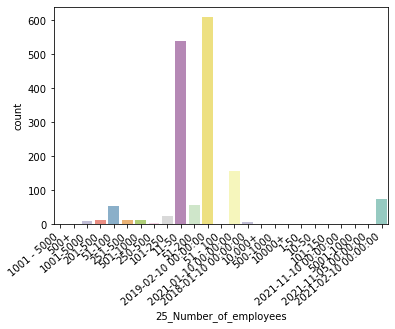

In [42]:
ax=sns.countplot(x = '25_Number_of_employees', data = df_needed, palette = 'Set3' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [43]:
df_needed['25_Number_of_employees'].dtypes

dtype('O')

In [44]:
df_needed.shape

(3084, 91)

In [45]:
#to remove null values in the last funding column consideredas the target variable
df_needed.dropna(subset=['15_Last_funding_round_raised_type'], inplace=True)

In [46]:
df_needed.shape

(675, 91)

In [47]:
df_needed.drop(df_needed.index[df_needed['15_Last_funding_round_raised_type'] == '-'], inplace = True)

In [48]:
df_needed.shape

(663, 91)

In [49]:
df_needed['15_Last_funding_round_raised_type'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':0,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Acquisition':0,'Venture - Series Unknown':1,
                                       'Series B II':1,'Non-Equity':1,'Early Stage Venture':1,'Non-Equity Assistnace ':1,
                                        'Grant ':1,'Seed ':0,'Acquired':0,'Pre-Seed Round':0,'Angel ':0,'Venture Funding':0,
                                        'Pre-Series B':0,'Seed Round':0,'Accelerator':0,'Debt Facility':0,'Non-equity Assistance':0,'Private Equity Round':0,
                                        'Private Equity ':0,'Non-Equity Assistnace':0}, inplace=True)

In [50]:
df_needed['15_Last_funding_round_raised_type'].value_counts().to_frame()

,15_Last_funding_round_raised_type
0,452
1,211


In [51]:
df_needed['17_Largest_round'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':1,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Seed ':0,'Grant ':1,'Private Equity ':1}, inplace=True)

In [52]:
df_needed['18_Amount'].replace({'Undisclosed':0,'MTN Group':0,'None':0}, inplace=True)
df_needed['18_Amount'].replace({'Undisclosed':0,'None':0}, inplace=True)


In [53]:
df_needed.drop(df_needed.index[df_needed['17_Largest_round'] == '-'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'MTN Group'], inplace = True)


In [54]:
#checking the size after deleting some rows
df_needed.shape

(497, 91)

In [55]:
df_needed['17_Largest_round'].value_counts().to_frame()

,17_Largest_round
0,306
1,143


In [56]:
#Replacing the e-commerce,fitness...to  Active
df_needed['3_Status'].replace({'E-Commerce, Fitness, Health Care, Information Technology, Marketplace, Mobile, Wellness':'Active'}, inplace=True)

In [57]:
df_needed.dropna(subset=['3_Status'], inplace=True)

In [58]:
df_needed['3_Status'].isnull().sum()

0

In [59]:
df_needed['10_Total_Venture_Funding (Disclosed)'].fillna(0, inplace=True)
#df[1].fillna(0, inplace=True)

In [60]:
df_needed['18_Amount'].fillna(0, inplace=True)
#18_Amount

In [61]:
df_needed['18_Amount'].isnull().sum()

0

In [62]:
#df_needed['4_Year_founded'].hist()

In [63]:
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,1,409806000,1,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",Not known,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,0.0,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,1,100000000,1,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",Not known,South Africa,South Africa,South Africa,NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,0,69000000,0,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Comme

In [64]:
df_A = df_needed.loc[df_needed['15_Last_funding_round_raised_type'] == 1]
df_A.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,1,409806000,1,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",Not known,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,0.0,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,1,100000000,1,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
5,Swvl,Swvl is the premium alternative to public tran...,Active,2017.0,"Cairo, Egypt","Nairobi, Kenya",Egypt,Egypt,"Egypt, Kenya, Nigeria",NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,1,30000000,1,8000000,Mostafa Kandil,NaN,Transport & Logistics,"Internet, Mobi

In [65]:
df_A.dropna(subset=['Year of recieving Series A '], inplace=True)
df_A['Year of recieving Series A '].isnull().sum()
#df_needed.dropna(subset=['15_Last_funding_round_raised_type'], inplace=True)
#df_A.columns

<ipython-input-65-a1f3fd67e643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A.dropna(subset=['Year of recieving Series A '], inplace=True)


0

In [66]:
len(df_A)

118

In [67]:
df_A['4_Year_founded'].isnull().sum()

0

In [68]:
 #age of company..
df_A['age_of_company'] = df_A['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)
df_A['Years of recieving series A from founded year'] = df_A['Year of recieving Series A ']- df_A['4_Year_founded']
df_A.head()

<ipython-input-68-1a67a59cf8dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['age_of_company'] = df_A['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)
<ipython-input-68-1a67a59cf8dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['Years of recieving series A from founded year'] = df_A['Year of recieving Series A ']- df_A['4_Year_founded']


,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,age_of_company,Years of recieving series A from founded year
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,1,409806000,1,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",Not known,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,9.0,0.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,0.0,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,1,100000000,1,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,7.0,1.0
5,Swvl,Swvl is the premium alternative to public tran...,Active,2017.0,"Cairo, Egypt","Nairobi, Kenya",Egypt,Egypt,"Egypt, Kenya, Nigeria",NaN,0.0,NaN,NaN,Not known,NaN,NaN,NaN,

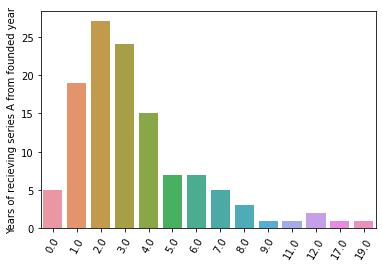

In [69]:
#cat_num = df_A['Years of recieving series A from founded year'].value_counts()  #number of each category
cat_num=df_A["Years of recieving series A from founded year"].value_counts()
#print("graph for %s: total = %d" % (i, len(cat_num)))  #printing the number of categories at the top
chart = sns.barplot(x=cat_num.index, y=cat_num)  #x axis with cat number index(different kinds) and y axis with the number of category
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)  #making the xlabels in 90 degress
plt.show()

In [70]:
df_A["Years of recieving series A from founded year"].mean()

3.5677966101694913

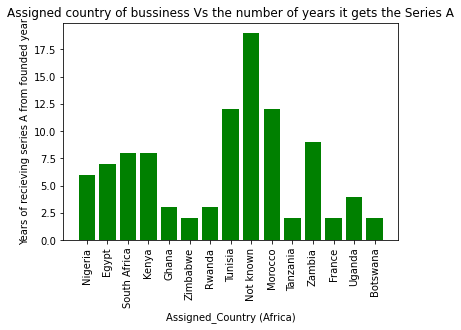

In [178]:
x=df_A["7.2_Assigned_Country (Africa)"]
y=df_A["Years of recieving series A from founded year"]
plt.bar(x,y, color='green')
plt.xticks(rotation=90)
plt.xlabel('Assigned_Country (Africa)')
plt.ylabel('Years of recieving series A from founded year')
plt.title("Assigned country of bussiness Vs the number of years it gets the Series A")
plt.show()

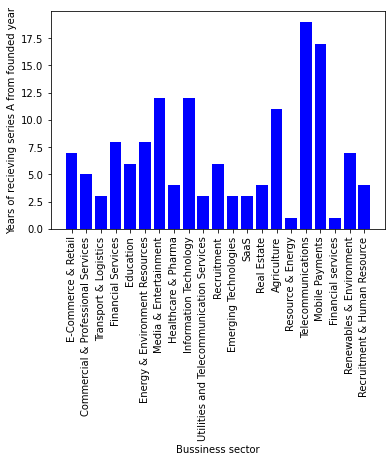

In [179]:
x=df_A["21_Main_sector"]
y=df_A["Years of recieving series A from founded year"]
plt.bar(x,y, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Bussiness sector')
plt.ylabel('Years of recieving series A from founded year')
#plt.title("Business sector Vs the number of years it gets the Series A")
plt.show()


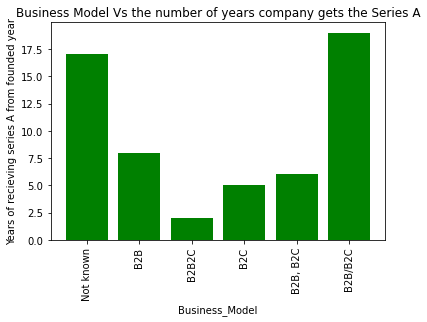

In [180]:
x=df_A["23_Business_Model"]
y=df_A["Years of recieving series A from founded year"]
plt.bar(x,y, color='green')
plt.xticks(rotation=90)
plt.xlabel('Business_Model')
plt.ylabel('Years of recieving series A from founded year')
plt.title("Business Model Vs the number of years company gets the Series A")
plt.show()

In [71]:
df_new = df_deals[['2_post_title','1_post_date','3_amount','5_funding_round','Founded']]
#brics[["country", "capital"]]
df_new.head()
df_andela = df_new.loc[df_new['2_post_title'] == "Maungo Craft"]
df_andela

,2_post_title,1_post_date,3_amount,5_funding_round,Founded
1277,Maungo Craft,2019-09-18,50000,Grant,NaN


In [72]:
#df_andela.set_index('Year').diff()
df_andela['A_dif'] = df_andela['1_post_date'].diff()
df_andela['A_dif']

<ipython-input-72-0882acad289e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andela['A_dif'] = df_andela['1_post_date'].diff()


1277   NaT
Name: A_dif, dtype: timedelta64[ns]

15_Last_funding_round_raised_type    0    1
3_Status                                   
Acquired                             4    2
Active                             331  155
Dead                                 2    1


<AxesSubplot:xlabel='3_Status'>

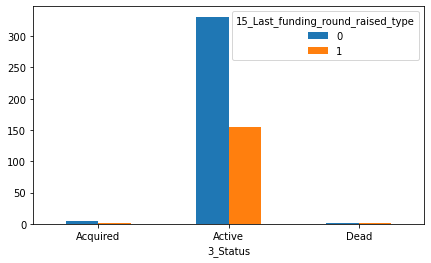

In [73]:
CrosstabResult=pd.crosstab(index=df_needed['3_Status'],columns=df_needed['15_Last_funding_round_raised_type'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

17_Largest_round    0    1
3_Status                  
Acquired            4    1
Active            299  141
Dead                2    1


<AxesSubplot:xlabel='3_Status'>

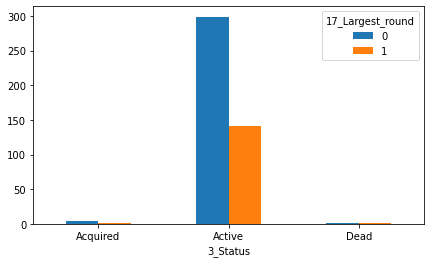

In [184]:
CrosstabResult=pd.crosstab(index=df_needed['3_Status'],columns=df_needed['17_Largest_round'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

In [74]:
#Stage, DA Classified
#df_needed['Stage, DA Classified'].unique()  #displaying unique values.
#df_needed['Stage, DA Classified'].isnull().sum()
df_needed["Stage, DA Classified"].fillna("Not known", inplace = True) #replacing nan values with a string,not known

In [75]:
df_needed.columns

Index([                                     '1_Company_name',
                                     '2_Company_description',
                                                  '3_Status',
                                            '4_Year_founded',
                                            '5_Headquarters',
                                           '6_Other_offices',
                                            '7.1_Country HQ',
                             '7.2_Assigned_Country (Africa)',
          '8_Countries_of_operation_(Business Model/Market)',
                            '9_Country_Parent Incorporation',
                      '10_Total_Venture_Funding (Disclosed)',
                               '10.1_Funding Rounds (Named)',
                 '10.2_Number of Venture Funding rounds (#)',
                                              '11_Investors',
                                      '12_Company_Valuation',
                                 '13_Company_Valuation_Date',
        

In [76]:
#Choosing columns to use for the algorithms.
df_use = df_needed[['3_Status', '4_Year_founded','10_Total_Venture_Funding (Disclosed)','10.2_Number of Venture Funding rounds (#)',
                    '15_Last_funding_round_raised_type','16_Last funding round raised amount','18_Amount',
                'Companies Information, Level of Completeness','Total Number of Funding Rounds',
                   'Total Funding todate (disclosed)','Stage, DA Classified','Total Number of Venture Funding Rounds',
                   'Total Venture funding todate (disclosed)','Acquired','1. Grant','2. Seed','3. Early Venture',
                    '4. Late Venture','5. Debt Financing','6.Private Equity','7. Offerings','8. Exits',
                    'Sector_Information Technology',
                                'Sector_E-Commerce & Retail',
                 'Sector_Commercial & Professional Services','Average time of rounds(days)',
                    'Business_model_B2C','Business_model_B2B','Female_Co-Founder','Male_Co-Founder',
                    'number of market countires',
                                       'number of investors',
                                        'number of founders',
                            'number of bussiness categories',
                                   'number of other offices']]

In [77]:
df_use.head()

,3_Status,4_Year_founded,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),15_Last_funding_round_raised_type,16_Last funding round raised amount,18_Amount,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),"Stage, DA Classified",Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices
0,Active,2012.0,0.0,NaN,1,409806000,409806000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,529.0,0,0,0,0,14,0,2,3,14
1,Active,2014.0,0.0,NaN,1,100000000,100000000,0.870968,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,395.0,0,1,1,0,4,6,6,5,4
2,Acquired,2011.0,0.0,NaN,0,69000000,100000000,0.677419,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1054.0,0,0,0,0,1,0,1,3,0
3,Active,2011.0,0.0,NaN,0,20000000,55000000,0.838710,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,1,1,1,0,1,6,3,4,0
4,Active,2007.0,0.0,NaN,0,41000000,50000000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,195.0,0,0,0,0,1,0,2,3,0


In [78]:
#age of company..
df_use['age_of_company'] = df_use['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)
df_use.head()

<ipython-input-78-ebf717dbb61c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['age_of_company'] = df_use['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)


,3_Status,4_Year_founded,10_Total_Venture_Funding (Disclosed),10.2_Number of Venture Funding rounds (#),15_Last_funding_round_raised_type,16_Last funding round raised amount,18_Amount,"Companies Information, Level of Completeness",Total Number of Funding Rounds,Total Funding todate (disclosed),"Stage, DA Classified",Total Number of Venture Funding Rounds,Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,Average time of rounds(days),Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,age_of_company
0,Active,2012.0,0.0,NaN,1,409806000,409806000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,529.0,0,0,0,0,14,0,2,3,14,9.0
1,Active,2014.0,0.0,NaN,1,100000000,100000000,0.870968,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,395.0,0,1,1,0,4,6,6,5,4,7.0
2,Acquired,2011.0,0.0,NaN,0,69000000,100000000,0.677419,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1054.0,0,0,0,0,1,0,1,3,0,10.0
3,Active,2011.0,0.0,NaN,0,20000000,55000000,0.838710,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,1,1,1,0,1,6,3,4,0,10.0
4,Active,2007.0,0.0,NaN,0,41000000,50000000,0.709677,NaN,NaN,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,195.0,0,0,0,0,1,0,2,3,0,14.0


In [79]:
#df_use.drop(['4_Year_founded'], axis = 1)
del df_use['4_Year_founded']

In [80]:

#df_use['age_of_company'].value_counts()

In [81]:
df_use.fillna(0, inplace=True)

C:\Users\AGNES\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [82]:
df_use['Average time of rounds(days)'].isnull().sum()

0

In [83]:
df_use.isnull().sum()

3_Status                                        0
10_Total_Venture_Funding (Disclosed)            0
10.2_Number of Venture Funding rounds (#)       0
15_Last_funding_round_raised_type               0
16_Last funding round raised amount             0
18_Amount                                       0
Companies Information, Level of Completeness    0
Total Number of Funding Rounds                  0
Total Funding todate (disclosed)                0
Stage, DA Classified                            0
Total Number of Venture Funding Rounds          0
Total Venture funding todate (disclosed)        0
Acquired                                        0
1. Grant                                        0
2. Seed                                         0
3. Early Venture                                0
4. Late Venture                                 0
5. Debt Financing                               0
6.Private Equity                                0
7. Offerings                                    0


graph for 3_Status: total = 3


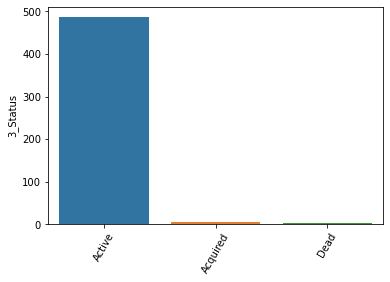

graph for 10_Total_Venture_Funding (Disclosed): total = 8


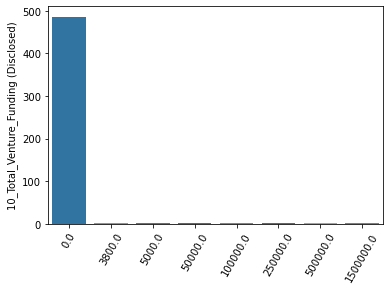

graph for 10.2_Number of Venture Funding rounds (#): total = 3


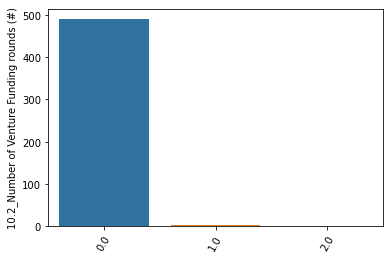

graph for 15_Last_funding_round_raised_type: total = 2


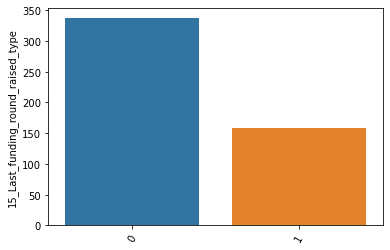

graph for 16_Last funding round raised amount: total = 193


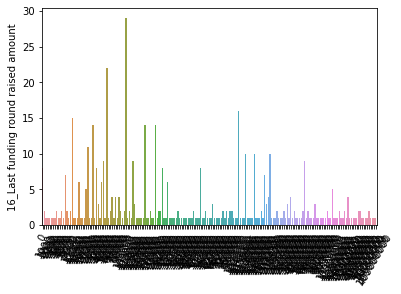

graph for 18_Amount: total = 180


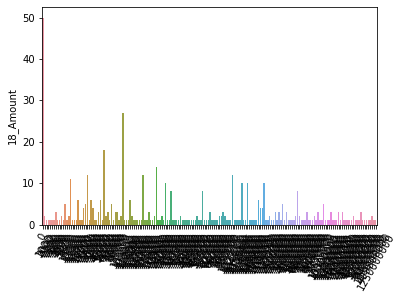

graph for Companies Information, Level of Completeness: total = 20


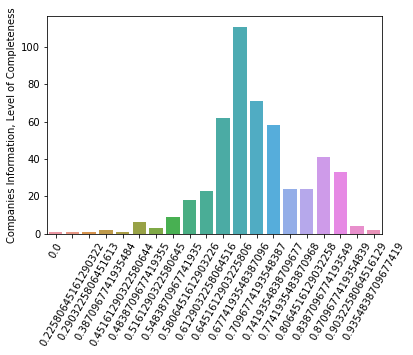

graph for Total Number of Funding Rounds: total = 1


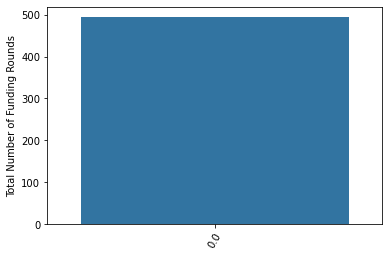

graph for Total Funding todate (disclosed): total = 1


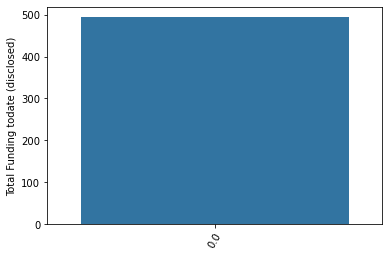

graph for Stage, DA Classified: total = 4


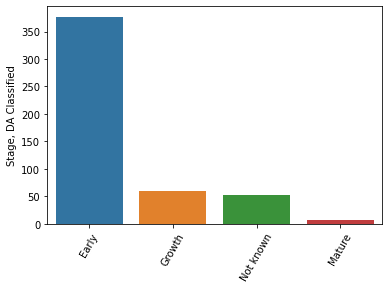

graph for Total Number of Venture Funding Rounds: total = 1


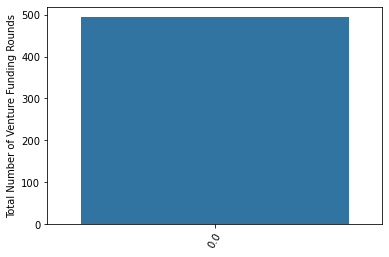

graph for Total Venture funding todate (disclosed): total = 1


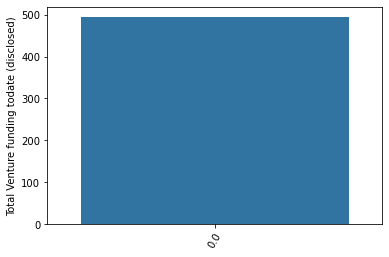

graph for Acquired: total = 1


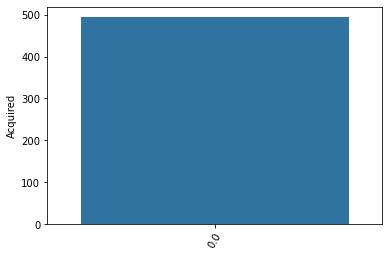

graph for 1. Grant: total = 1


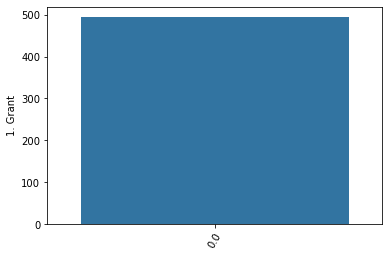

graph for 2. Seed: total = 1


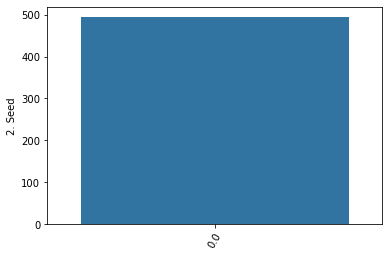

graph for 3. Early Venture: total = 1


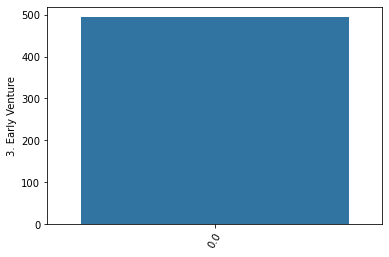

graph for 4. Late Venture: total = 1


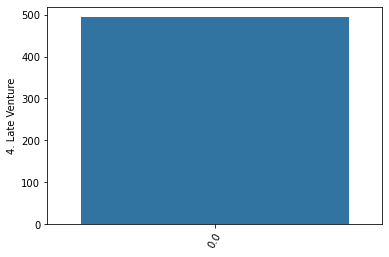

graph for 5. Debt Financing: total = 1


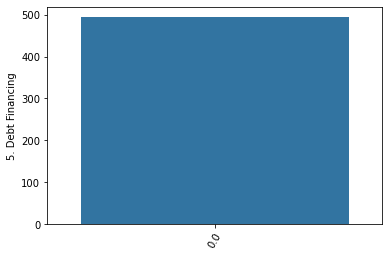

graph for 6.Private Equity: total = 1


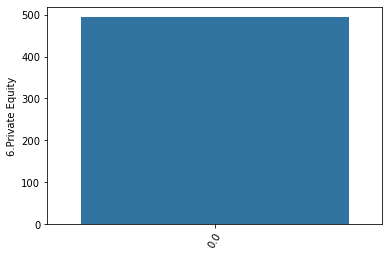

graph for 7. Offerings: total = 1


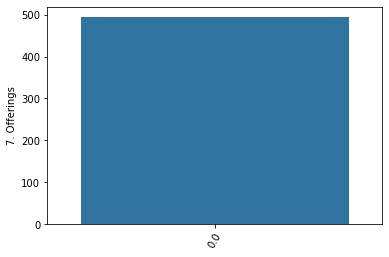

graph for 8. Exits: total = 1


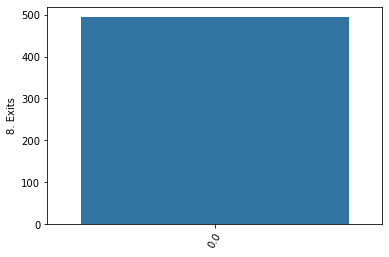

graph for Sector_Information Technology: total = 2


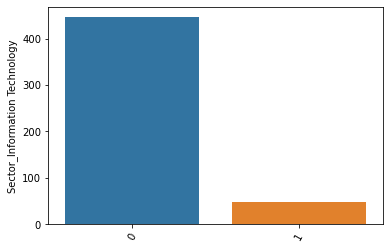

graph for Sector_E-Commerce & Retail: total = 1


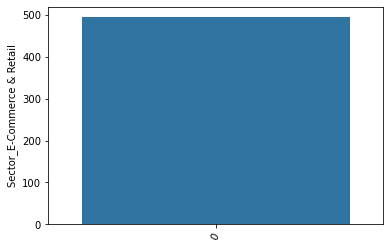

graph for Sector_Commercial & Professional Services: total = 1


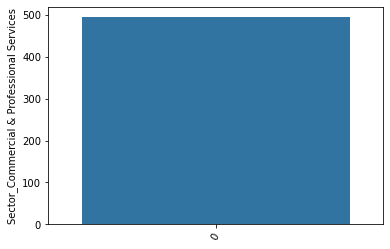

graph for Average time of rounds(days): total = 146


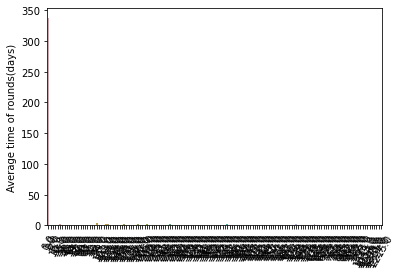

graph for Business_model_B2C: total = 2


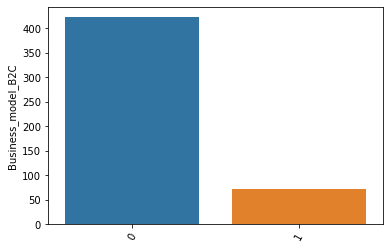

graph for Business_model_B2B: total = 2


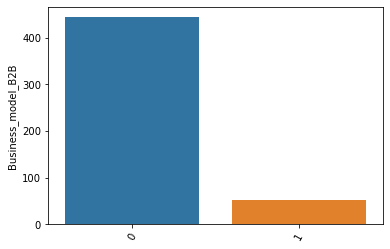

graph for Female_Co-Founder: total = 2


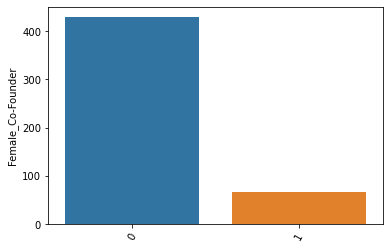

graph for Male_Co-Founder: total = 2


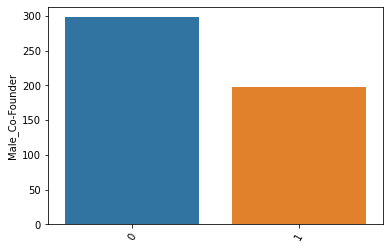

graph for number of market countires: total = 13


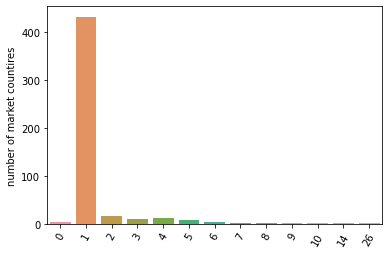

graph for number of investors: total = 10


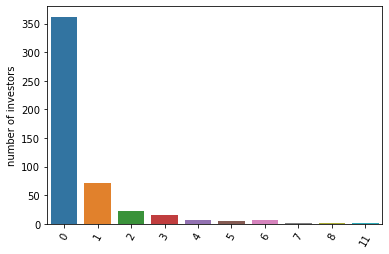

graph for number of founders: total = 7


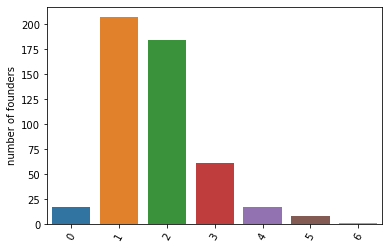

graph for number of bussiness categories: total = 15


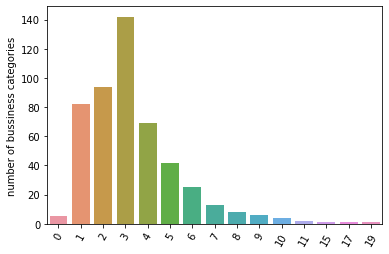

graph for number of other offices: total = 9


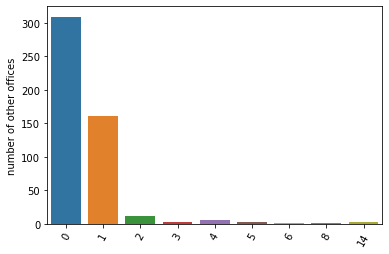

graph for age_of_company: total = 21


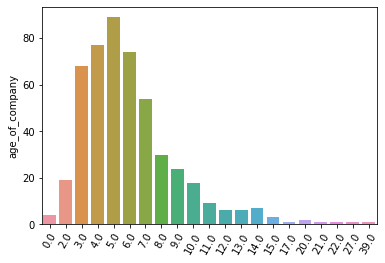

In [195]:
for i in df_use.columns:
    cat_num = df_use[i].value_counts()  #number of each category
    print("graph for %s: total = %d" % (i, len(cat_num)))  #printing the number of categories at the top
    chart = sns.barplot(x=cat_num.index, y=cat_num)  #x axis with cat number index(different kinds) and y axis with the number of category
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60)  #making the xlabels in 90 degress
    plt.show()

<AxesSubplot:xlabel='15_Last_funding_round_raised_type', ylabel='count'>

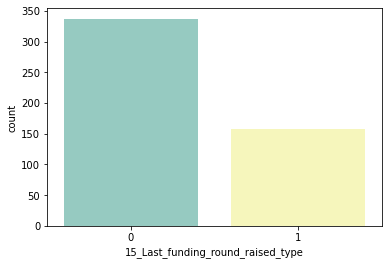

In [196]:
#checking the distribution of the y variable
sns.countplot(x = '15_Last_funding_round_raised_type', data = df_use, palette = 'Set3' )

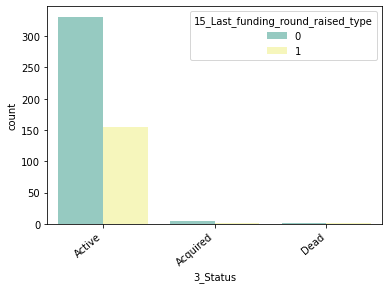

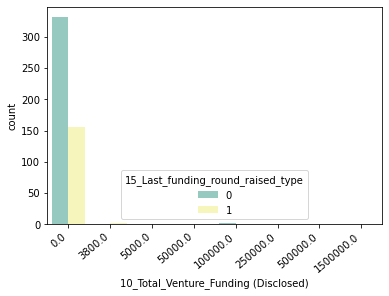

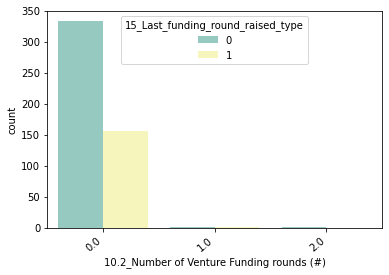

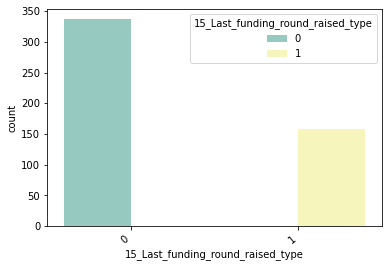

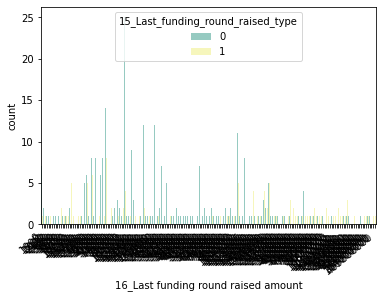

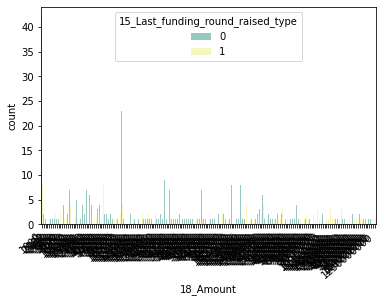

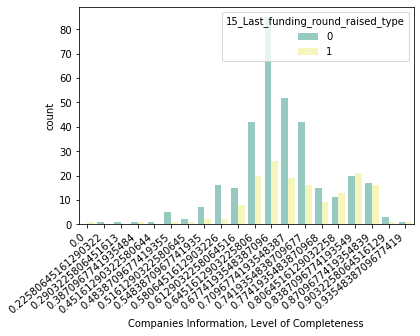

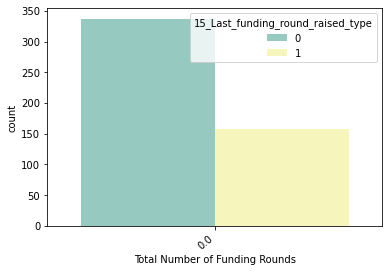

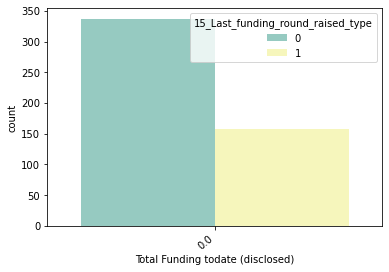

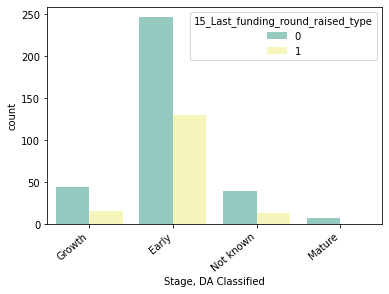

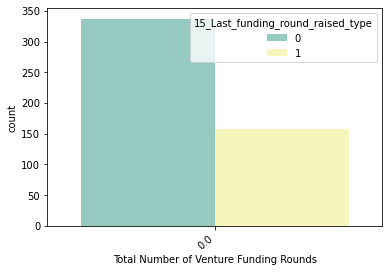

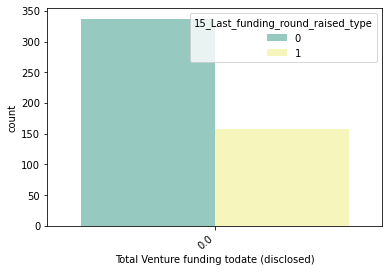

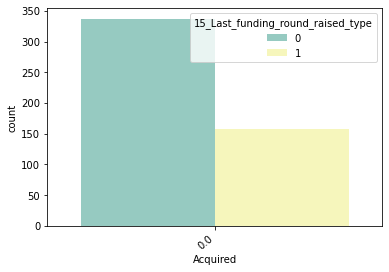

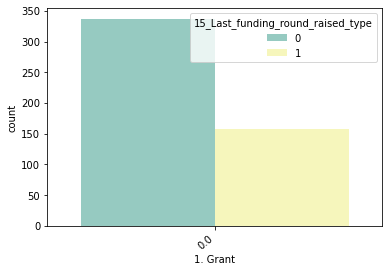

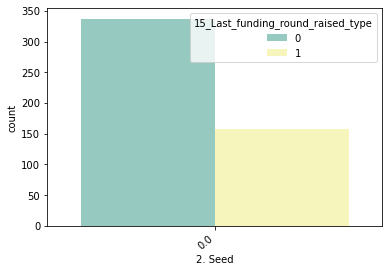

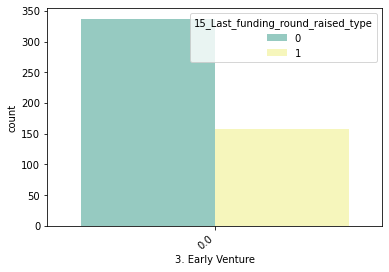

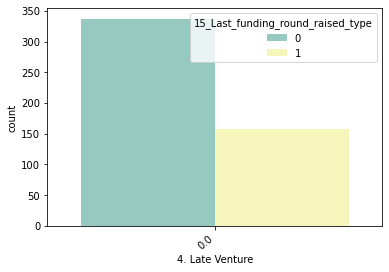

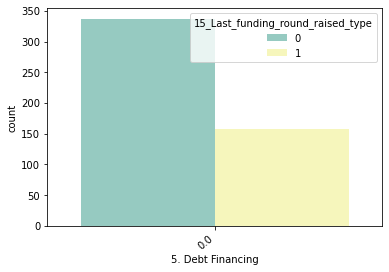

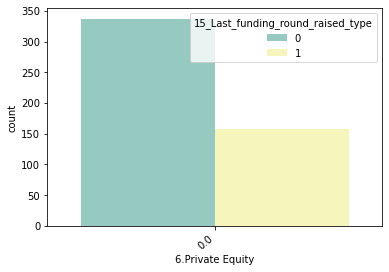

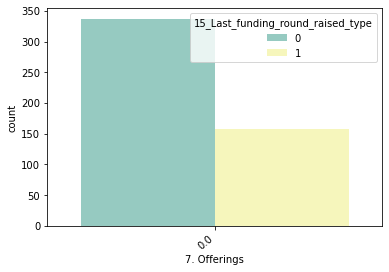

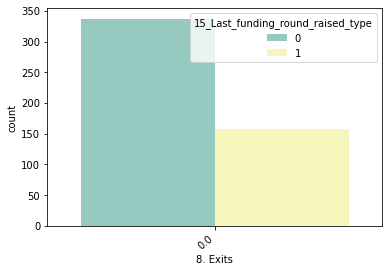

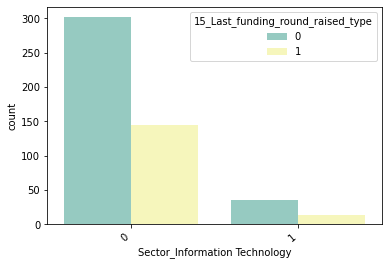

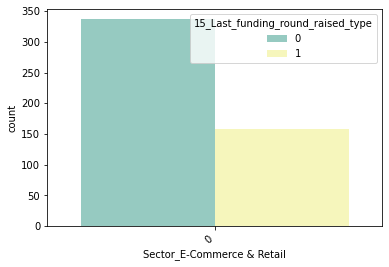

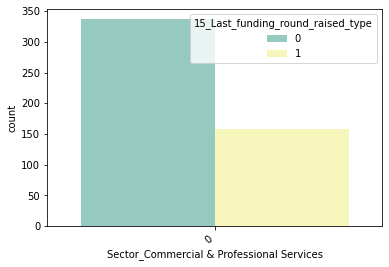

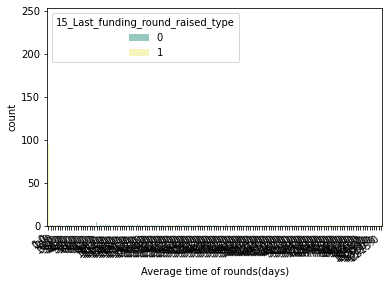

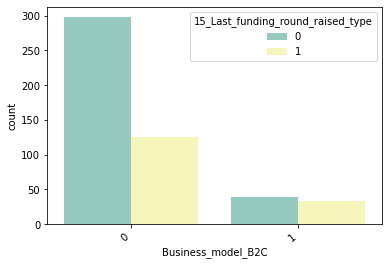

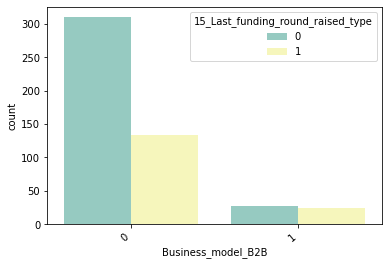

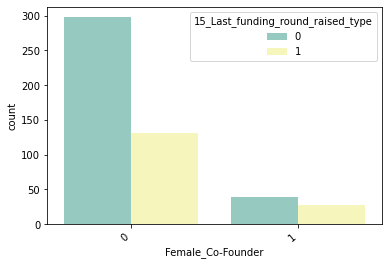

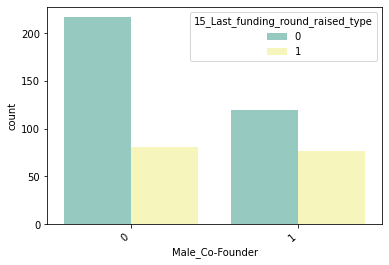

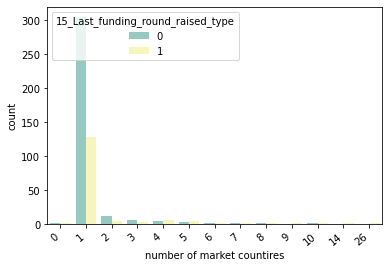

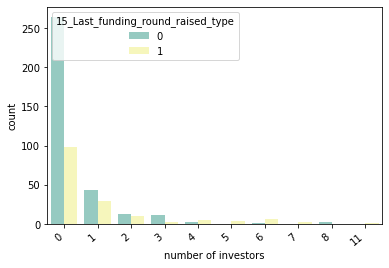

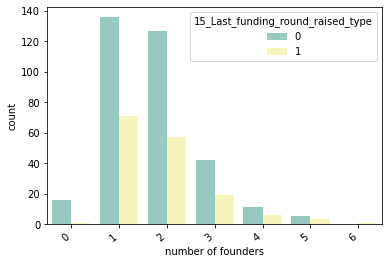

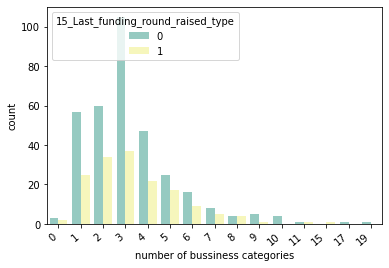

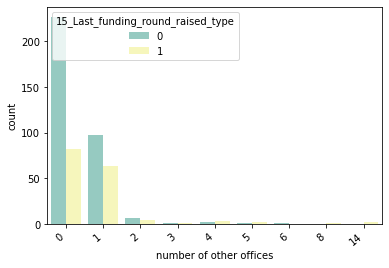

In [198]:
# Looping through all the features by our y variable - see if there is relationship

features = ['3_Status','10_Total_Venture_Funding (Disclosed)','10.2_Number of Venture Funding rounds (#)',
                    '15_Last_funding_round_raised_type','16_Last funding round raised amount','18_Amount',
                'Companies Information, Level of Completeness','Total Number of Funding Rounds',
                   'Total Funding todate (disclosed)','Stage, DA Classified','Total Number of Venture Funding Rounds',
                   'Total Venture funding todate (disclosed)','Acquired','1. Grant','2. Seed','3. Early Venture',
                    '4. Late Venture','5. Debt Financing','6.Private Equity','7. Offerings','8. Exits',
                             'Sector_Information Technology',
                                'Sector_E-Commerce & Retail',
                 'Sector_Commercial & Professional Services','Average time of rounds(days)',
            'Business_model_B2C','Business_model_B2B','Female_Co-Founder','Male_Co-Founder',
            'number of market countires',
                                       'number of investors',
                                        'number of founders',
                            'number of bussiness categories',
                                   'number of other offices']
for f in features:
    ax=sns.countplot(x = f, data = df_use, palette = 'Set3', hue = '15_Last_funding_round_raised_type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()